In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/output_database/global_power_plant_database.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [14]:
x_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'generation_data_source',
    'estimated_generation_gwh_2013',
    'estimated_generation_gwh_2014',
    'estimated_generation_gwh_2015',
    'estimated_generation_note_2016',
    'estimated_generation_note_2017']

In [15]:
len(x_column)

21

In [16]:
data=data[x_column].copy()

In [17]:
data.sample(5)

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,...,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_note_2016,estimated_generation_note_2017
5557,CHN,China,Datang Qitaihe power station,1900.000,Coal,NaN,NaN,NaN,2006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,CAPACITY-FACTOR-V1
27002,USA,United States of America,Deep Creek,20.000,Hydro,NaN,NaN,NaN,1925.0,2019.0,...,20.876,25.702,23.184,30.037,U.S. Energy Information Administration,48.48,54.09,54.17,HYDRO-V1,HYDRO-V1
14748,IND,India,Kadiri,5.000,Solar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.81,9.73,9.79,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
8488,CHN,China,Tianshengqiao II,1320.000,Hydro,NaN,NaN,NaN,1997.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4586.90,4667.19,4663.91,HYDRO-V1,HYDRO-V1
1906,BRA,Brazil,EnergyWorks Corn Products Mogi,30.775,Gas,NaN,NaN,NaN,2003.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [18]:
data.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015
count,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,16120.000000,16503.000000,17050.000000
mean,163.355148,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,239.112221,242.431122,235.866067
std,489.636072,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1191.258172,1285.798297,1267.005223
min,1.000000,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,1.120000,0.870000,0.440000
25%,4.900000,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,8.620000,8.680000,8.380000
50%,16.745000,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,27.620000,28.250000,26.830000
75%,75.344250,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,106.805000,106.980000,103.120000
max,22500.000000,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,48675.060000,58470.770000,57113.350000


In [23]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
data.country_long.nunique()

167

In [25]:
c_plant=data.country_long.value_counts().head(20)
c_plant

United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Japan                        522
Australia                    486
Portugal                     469
Czech Republic               462
Italy                        396
Chile                        315
Norway                       306
Mexico                       277
Vietnam                      236
Argentina                    236
Name: country_long, dtype: int64

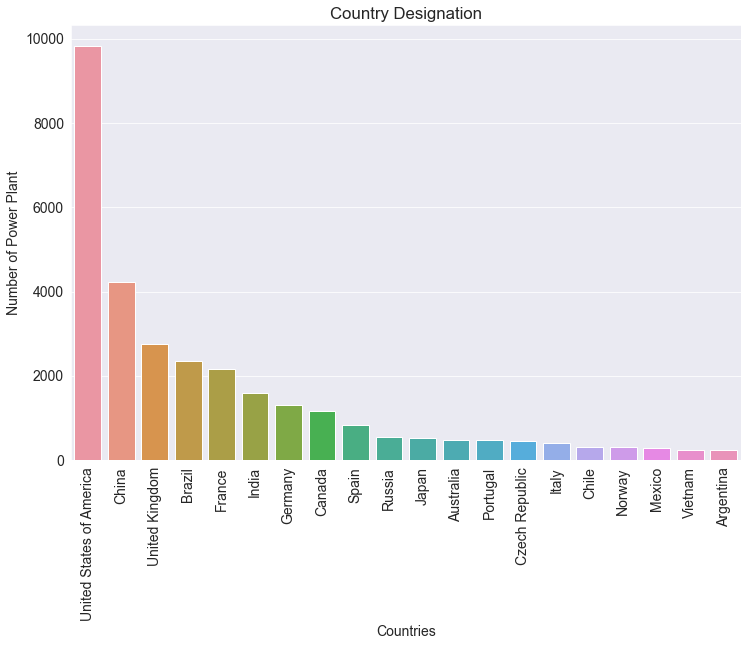

In [26]:
sns.barplot(x = c_plant.index, y = c_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

In [28]:
mpl= data.primary_fuel.value_counts()*160/data.primary_fuel.count()
mpl

Solar             48.843600
Hydro             32.773071
Wind              24.474468
Gas               18.310053
Coal              10.670941
Oil               10.625143
Biomass            6.549118
Waste              4.891230
Nuclear            0.893062
Geothermal         0.865583
Storage            0.618273
Other              0.196932
Cogeneration       0.187772
Petcoke            0.054958
Wave and Tidal     0.045798
Name: primary_fuel, dtype: float64

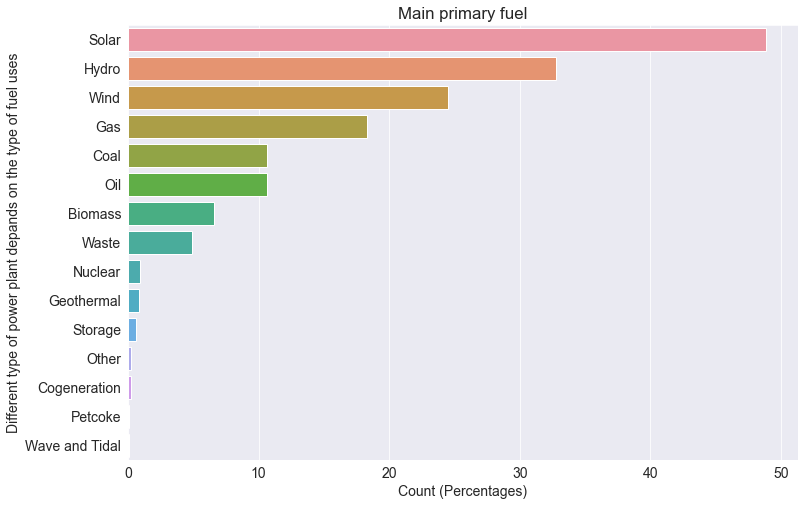

In [29]:
sns.barplot(x = mpl, y = mpl.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

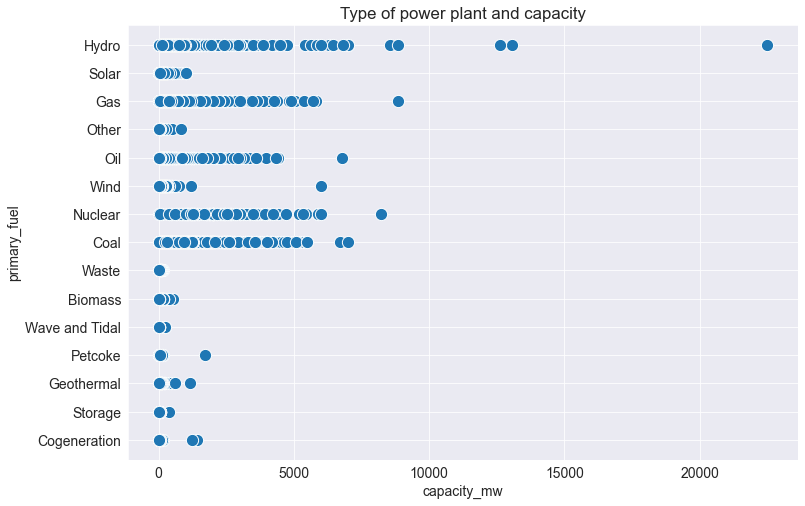

In [30]:
sns.scatterplot(x = data.capacity_mw, y = data.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [31]:
c_capacity= data.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending=False)
c_capacity

,capacity_mw
country_long,
China,1415067.380
United States of America,1204638.050
India,316088.546
Russia,228220.050
Japan,215365.850
...,...
Guinea-Bissau,18.237
Antarctica,7.600
Palestine,7.600


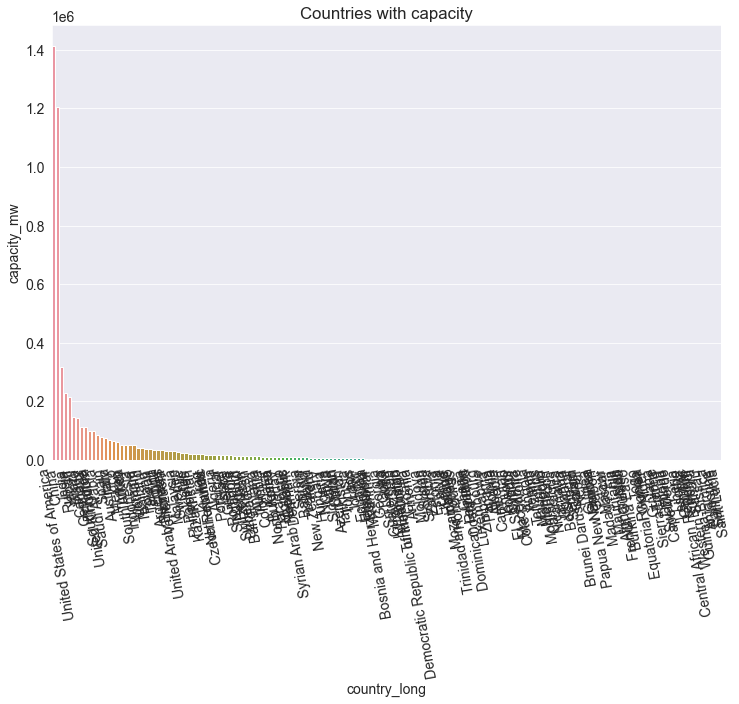

In [38]:
sns.barplot(x = c_capacity.index, y = c_capacity.capacity_mw)
plt.xticks(rotation = 100)
plt.title('Countries with capacity');

In [39]:
data.generation_gwh_2013.isna().sum()

28519

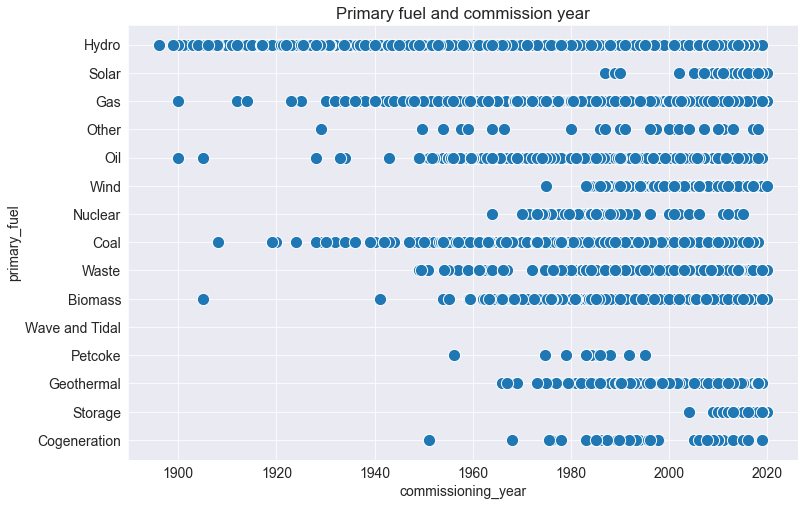

In [47]:
sns.scatterplot(x = data.commissioning_year, y = data.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

In [48]:
data.primary_fuel.unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [49]:
re = data[data.primary_fuel.isin(['Hydro', 'Wind', 'Solar', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Storage'])]
nre = re.country_long.value_counts().head(30)
nre

United States of America    6193
China                       3102
United Kingdom              2333
France                      2117
Brazil                      1581
India                       1242
Canada                      1052
Germany                      925
Spain                        710
Portugal                     439
Czech Republic               435
Japan                        399
Italy                        315
Norway                       301
Australia                    232
Chile                        216
Vietnam                      197
Mexico                       189
Russia                       171
Switzerland                  164
Sweden                       160
Thailand                     158
Finland                      146
Turkey                       115
Poland                       102
Austria                      100
Philippines                   78
South Africa                  76
Argentina                     69
South Korea                   68
Name: coun

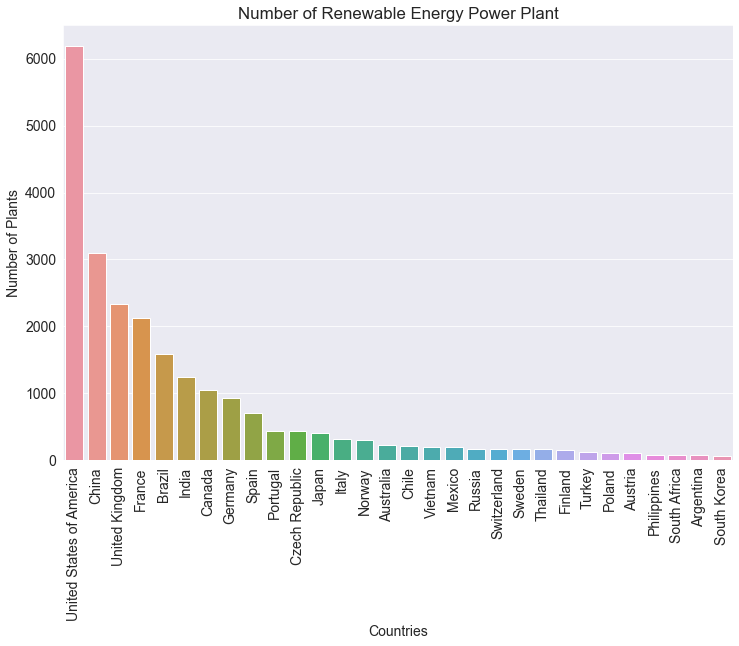

In [50]:
sns.barplot(x = nre.index, y = nre)
plt.xticks(rotation = 90)
plt.title('Number of Renewable Energy Power Plant')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [51]:
ff = data[data.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear', 'Petcoke', 'Cogeneration'])]
nff = ff.country_long.value_counts().head(30)
nff

United States of America    3083
China                       1133
Brazil                       766
Russia                       372
India                        347
Germany                      307
Australia                    204
Argentina                    165
Indonesia                    127
Japan                        122
Canada                       105
Spain                        104
Chile                         99
United Kingdom                89
Mexico                        88
Poland                        87
Saudi Arabia                  84
Iran                          79
Italy                         77
South Korea                   60
Bangladesh                    54
Turkey                        48
Philippines                   45
Vietnam                       39
Thailand                      38
Egypt                         38
France                        38
Pakistan                      36
Finland                       35
Venezuela                     34
Name: coun

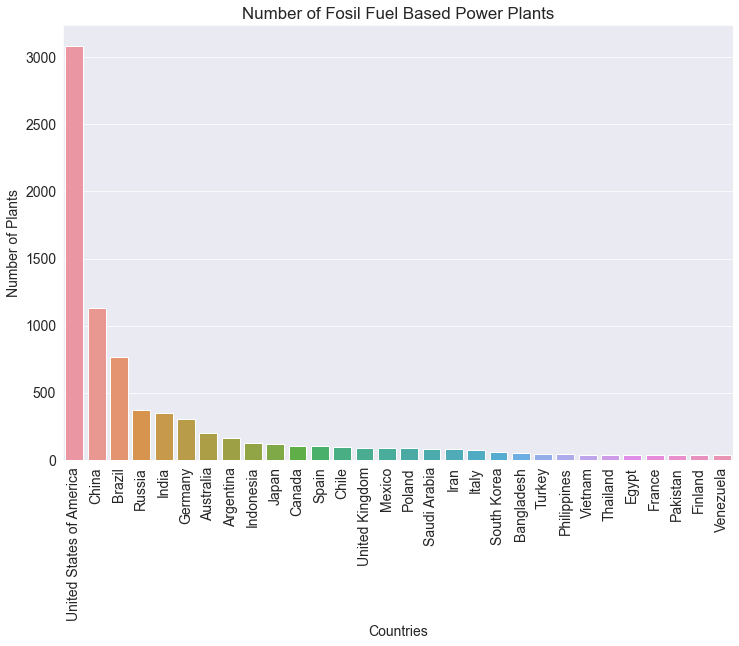

In [52]:
sns.barplot(x = nff.index, y = nff)
plt.xticks(rotation = 90)
plt.title('Number of Fosil Fuel Based Power Plants')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [54]:
npp = data[data.generation_gwh_2013 < 0]
ng_2013 = npp.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False)

npp = data[data.generation_gwh_2014 < 0]
ng_2014 = npp.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False)

npp = data[data.generation_gwh_2015 < 0]
ng_2015 = npp.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False)

npp = data[data.generation_gwh_2016 < 0]
ng_2016 = npp.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False)

npp = data[data.generation_gwh_2017 < 0]
ng_2017 = npp.groupby('country_long')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False)

In [55]:
ng_2013_to_2017 = pd.DataFrame([ng_2013.generation_gwh_2013, ng_2014.generation_gwh_2014, ng_2015.generation_gwh_2015, ng_2016.generation_gwh_2016, ng_2017.generation_gwh_2017])
ng_2013_to_2017

country_long,United States of America,Finland,Slovakia
generation_gwh_2013,-5519.553000,NaN,NaN
generation_gwh_2014,-6592.128000,NaN,NaN
generation_gwh_2015,-6057.351959,NaN,NaN
generation_gwh_2016,-7288.242000,-0.076,NaN
generation_gwh_2017,-6855.175005,NaN,-84.156


In [56]:
ng_2013_to_2017.sum()

country_long
United States of America   -32312.449964
Finland                        -0.076000
Slovakia                      -84.156000
dtype: float64

In [59]:
npt = data[data.primary_fuel.isin(['Nuclear'])]
nnpt = npt.country_long.value_counts().head(35)
nnpt

United States of America    58
France                      19
Japan                       16
China                       12
Russia                      10
India                        9
United Kingdom               8
Germany                      7
Canada                       6
South Korea                  6
Spain                        5
Ukraine                      4
Switzerland                  4
Taiwan                       3
Sweden                       3
Argentina                    3
Belgium                      3
Pakistan                     2
Slovakia                     2
Finland                      2
Czech Republic               2
Brazil                       2
Netherlands                  1
Romania                      1
Armenia                      1
Slovenia                     1
South Africa                 1
Iran                         1
Hungary                      1
Bulgaria                     1
Mexico                       1
Name: country_long, dtype: int64

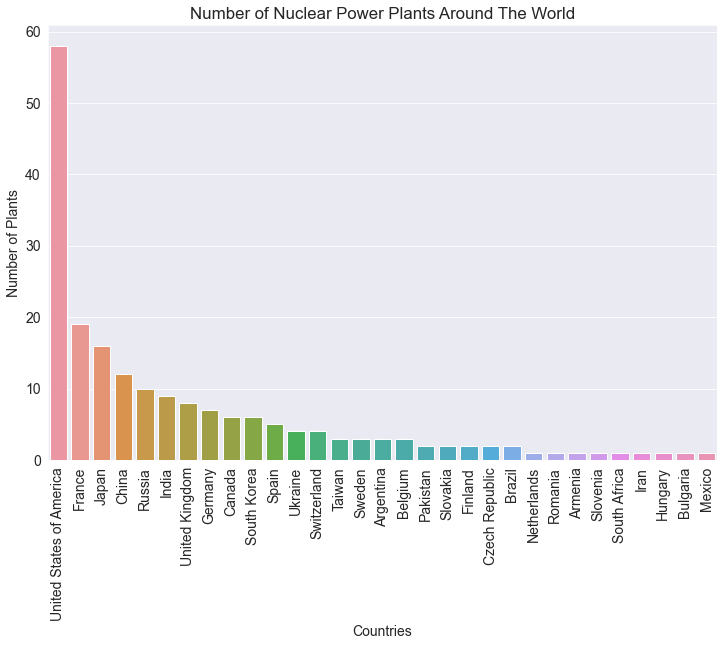

In [60]:
sns.barplot(x = nnpt.index, y = nnpt)
plt.xticks(rotation = 90)
plt.title('Number of Nuclear Power Plants Around The World')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [62]:
print('There are {} counties have total {} nuclear power plants.'.format(len(nnpt), nnpt.sum()))

There are 31 counties have total 195 nuclear power plants.


In [63]:
bpp = data[data.country_long == 'Bangladesh']

In [64]:
tpp = bpp.country_long.value_counts()
tpp

Bangladesh    57
Name: country_long, dtype: int64

In [65]:
tc = bpp.capacity_mw.sum()
print('Bangladesh has total capacity of {} megawatt.'.format(tc))

Bangladesh has total capacity of 11840.0 megawatt.


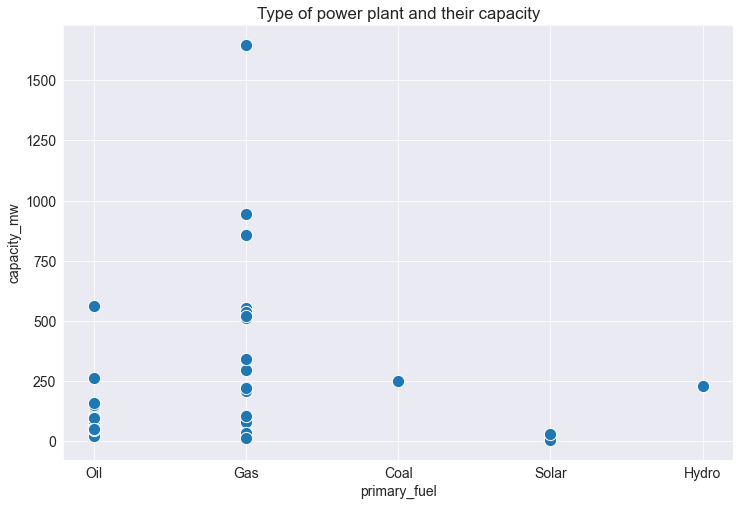

In [66]:
sns.scatterplot(x = bpp.primary_fuel, y = bpp.capacity_mw, s = 150)
plt.title('Type of power plant and their capacity');